In [4]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
import os
import pickle

np.set_printoptions(threshold=np.nan)

# from nn import nn_train, nn_eval

def midi_to_label(midi):
    if (midi < strings[0]):
        raise Error("Note " + note + " is not playable on a guitar in standard tuning.")

    idealString = 0
    for string, string_midi in enumerate(strings):
        if (midi < string_midi):
            break
        idealString = string

    label = [-1, -1, -1, -1, -1, -1]
    label[idealString] = midi - strings[idealString];
    return label

def process(filename):
    label = int(filename.split('/')[-1])
    #label = midi_to_label(int(filename.split('/')[-1]))

    f = open(filename, 'r')
    data = pickle.load(f)
    f.close()

    return data, label

strings = [40, 45, 50, 55, 60, 65];


def knn_train(process, files):
    knn_models = []

    for filename in files:
        X_train, y_train = process(filename)
        X_train = X_train[:len(X_train)*3/4]
        y_train = [y_train]*len(X_train)  #[np.asarray(y_train).reshape(1, 1)] * len(X_train)
        print("X_train:")
        print(X_train[:2])
        print(len(X_train[0][1]))
        print("y_train")
        print(y_train)

        print(len(X_train))
        print(len(y_train))

        neigh = KNeighborsRegressor(n_neighbors=1)
        neigh.fit(X_train, y_train) 

        knn_models.append(neigh)

    return knn_models

def knn_eval(neigh, process, files):
    for filename in files:
        X_test, y_test = process(filename)
        X_test = X_test[len(X_test)*3/4:]
        y_test = [y_test]*len(X_test)  #np.asarray(y_test).reshape(1, 1)
        print("X_test:")
        print(X_test)
        print("y_test")
        print(y_test)
        y_pred = neigh.predict(X_test)

        print("y_pred")
        print(y_pred)

        # print("Testing Accuracy:", \
        #     sess.run(accuracy, feed_dict={X: X_test,
        #                                   Y: y_test}))
    return

# def main():
#     files = ["Data/" + f for f in os.listdir('Data') if os.path.isfile("Data/" + f) and "DS_Store" not in f]
#     neigh = knn_train(process, files)
#     knn_eval(neigh, process, files)

# main()


TypeError: a bytes-like object is required, not 'str'

In [9]:
df.columns[-1]

31

In [75]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.neural_network import MLPClassifier

import os
import pickle

df = pd.read_csv("data2.csv", header=None)

df = df.sample(frac=1, random_state=50)

TARGET = [df.columns[-1]]
FEATS = [c for c in df.columns if c != TARGET[0]]

X_train = df[FEATS][:round(0.8*df.shape[0])]
y_train = df[TARGET][:round(0.8*df.shape[0])]

X_test = df[FEATS][round(0.8*df.shape[0]):]
y_test = df[TARGET][round(0.8*df.shape[0]):]

neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train.values.transpose()[0])

y_pred = neigh.predict(X_test.values)


mean_absolute_error(y_test, y_pred)
                               
                               
# for test, pred in zip(y_test.values, y_pred):
#     print(test, pred)


0.48411107930146013

In [82]:
y_pred[0]

70.0

In [94]:
y_test["true"] = y_pred
y_test["err"] = abs(y_test[255]-y_test["true"])
y_test

,255,true,err
12828,70,70.0,0.0
12290,68,68.0,0.0
409,40,40.0,0.0
2697,45,45.0,0.0
6314,54,54.0,0.0
7283,56,56.0,0.0
8737,60,60.0,0.0
14286,74,74.0,0.0
17320,88,88.0,0.0
5777,52,52.0,0.0


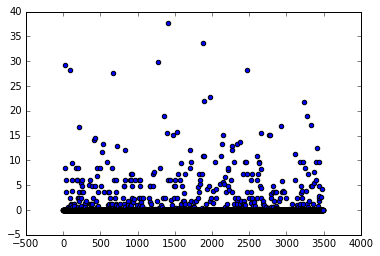

In [84]:
err = [abs(y_test.iloc[i].values[0]-y_pred[i]) for i in range(len(y_test))]


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(range(len(err)),err)
# print(y_train.iloc[i])
# plt.plot(x, np.cos(x))

plt.show()

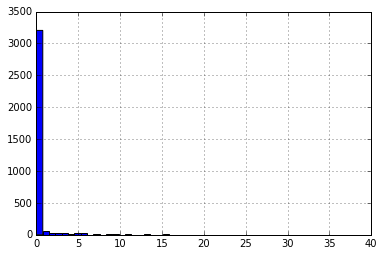

In [96]:
y_test["err"].hist(bins=50)

In [72]:
                               
for test, pred in zip(y_test.values, y_pred):
    print(test, pred)

[70] 70
[68] 68
[40] 40
[45] 45
[54] 54
[56] 56
[60] 60
[74] 74
[88] 88
[52] 52
[63] 63
[67] 67
[56] 56
[46] 46
[74] 74
[45] 45
[52] 52
[58] 58
[68] 68
[42] 42
[89] 89
[69] 69
[56] 56
[49] 77
[53] 53
[49] 49
[51] 51
[60] 60
[60] 60
[58] 58
[70] 70
[57] 57
[71] 71
[61] 61
[45] 45
[54] 54
[46] 46
[64] 64
[50] 50
[48] 48
[54] 54
[61] 61
[60] 60
[41] 41
[60] 60
[67] 55
[51] 51
[68] 68
[58] 58
[63] 63
[46] 46
[56] 56
[45] 45
[65] 65
[46] 46
[42] 42
[68] 68
[68] 68
[61] 61
[63] 63
[66] 66
[89] 89
[76] 76
[48] 48
[70] 70
[63] 63
[57] 57
[54] 54
[60] 60
[54] 54
[75] 75
[50] 50
[41] 41
[51] 51
[63] 63
[50] 50
[45] 45
[71] 71
[77] 77
[73] 73
[59] 59
[61] 61
[54] 54
[57] 57
[83] 83
[68] 68
[72] 72
[63] 63
[45] 45
[42] 42
[81] 81
[50] 50
[52] 52
[41] 41
[60] 60
[61] 61
[42] 42
[61] 61
[69] 69
[42] 42
[43] 43
[63] 63
[72] 72
[62] 62
[76] 76
[42] 42
[48] 48
[60] 52
[70] 70
[86] 86
[75] 75
[75] 75
[78] 78
[58] 58
[60] 60
[58] 58
[88] 88
[51] 51
[60] 60
[41] 41
[70] 70
[58] 58
[69] 69
[62] 62
[69] 69


In [61]:
X_train.iloc[0]

0     0.033661
1     0.033626
2     0.033799
3     0.034051
4     0.034389
5     0.035116
6     0.035822
7     0.036506
8     0.037487
9     0.038575
10    0.041670
11    0.043154
12    0.046200
13    0.057091
14    0.041207
15    0.049350
16    0.055646
17    0.117432
18    0.065602
19    0.075907
20    0.094446
21    0.055646
22    0.119970
23    0.185278
24    0.450444
25    0.411720
26    0.087324
27    0.180572
28    1.155750
29    0.541798
30    0.279667
Name: 16368, dtype: float64

255    65
Name: 11067, dtype: int64


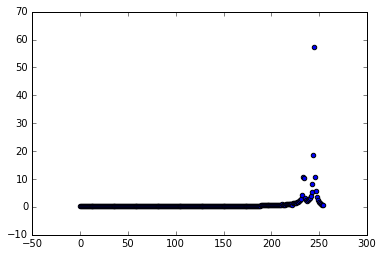

255    41
Name: 614, dtype: int64


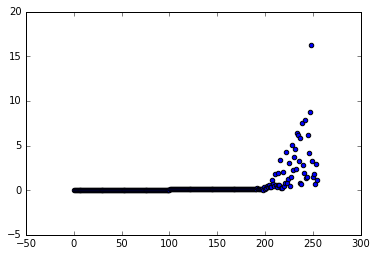

255    61
Name: 8973, dtype: int64


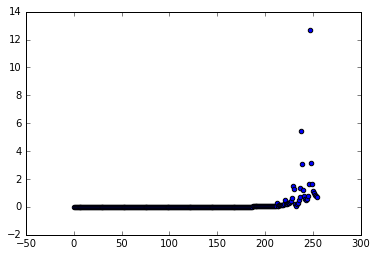

255    89
Name: 17411, dtype: int64


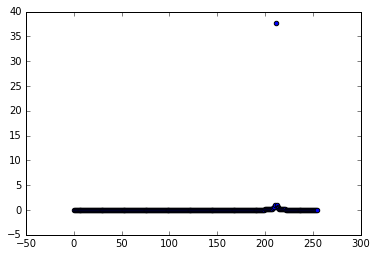

255    83
Name: 16610, dtype: int64


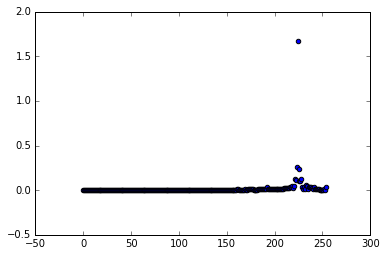

255    77
Name: 15618, dtype: int64


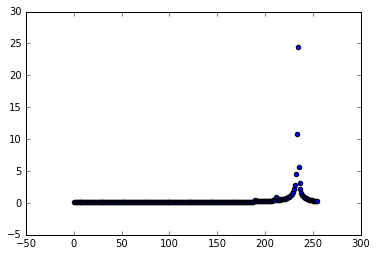

255    52
Name: 5406, dtype: int64


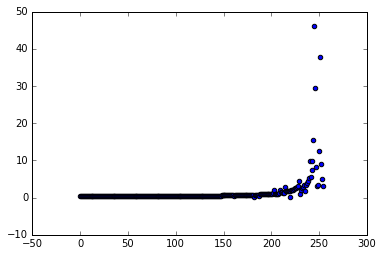

255    77
Name: 15608, dtype: int64


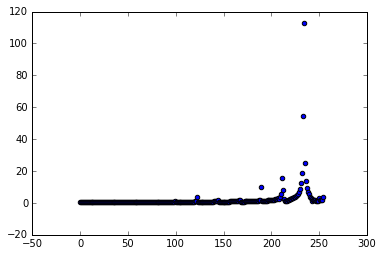

255    60
Name: 8685, dtype: int64


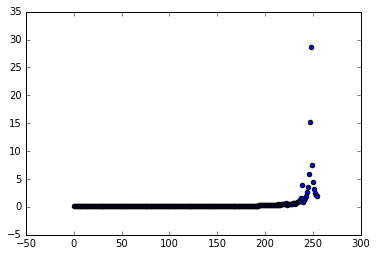

255    53
Name: 6145, dtype: int64


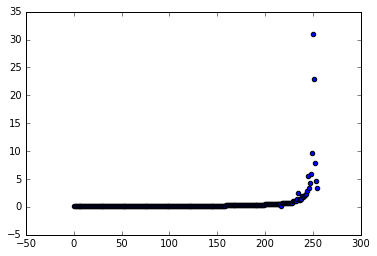

In [97]:

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.scatter(X_train.iloc[i].index,X_train.iloc[i])
    print(y_train.iloc[i])
# plt.plot(x, np.cos(x))

    plt.show()